<a href="https://colab.research.google.com/github/paulgureghian/Google_Colab_Notebooks/blob/master/Training_a_PyTorch_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created by Paul A. Gureghian on 11/24/18.**

**This notebook has the code to train a PyTorch deep learning network,**

**which makes it a 'smart' network.**

**I will show it real data, then adjust the network parameters.**

In [60]:
### Install PyTorch and Torchvision 
!pip3 install -U -q torchvision 
!pip3 install -U -q http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl

tcmalloc: large alloc 1073750016 bytes == 0x583d4000 @  0x7efe1a1062a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
### Import packages
import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import  datasets, transforms

In [0]:
### Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])

### Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [63]:
### Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)
print("Loss: ", loss)
print('')
print("Before backward pass:\n ", model[0].weight.grad)
print('')
loss.backward()
print("After backward pass:\n ", model[0].weight.grad)

Loss:  tensor(2.3109, grad_fn=<NllLossBackward>)

Before backward pass:
  None

After backward pass:
  tensor([[-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        ...,
        [-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023]])


In [64]:
### Print initial weights before training
print("Initial weights:\n ", model[0].weight)

Initial weights:
  Parameter containing:
tensor([[-0.0024,  0.0289,  0.0081,  ..., -0.0298,  0.0322,  0.0336],
        [-0.0073, -0.0066,  0.0160,  ..., -0.0236, -0.0068, -0.0120],
        [ 0.0217, -0.0166,  0.0234,  ..., -0.0029, -0.0205,  0.0110],
        ...,
        [-0.0184, -0.0003,  0.0324,  ...,  0.0317, -0.0014, -0.0170],
        [-0.0013,  0.0272,  0.0309,  ...,  0.0091, -0.0249, -0.0026],
        [ 0.0287, -0.0345,  0.0188,  ..., -0.0343, -0.0223, -0.0139]],
       requires_grad=True)


**Now I will put this algorithm into a loop.**

In [65]:
### Iterate over all the dataset images
epochs = 5
### Define an optimizer and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      
        ### flatten images into a 784 long vector
        images = images.view(images.shape[0], -1)

        ### clear the gradients
        optimizer.zero_grad()

        ### forward pass through the network
        ### get the network output
        output = model(images)

        ### calculate the loss with the logps and labels
        loss = criterion(output, labels)       
              
        ### backward pass through the network 
        loss.backward()
      
        ### update the weights
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}") 

Training loss: 1.8310978416440837
Training loss: 0.8072923103184588
Training loss: 0.5230883436321195
Training loss: 0.43013259770074636
Training loss: 0.3854167649645541


In [66]:
### After optimizer step
print("Updated weights:\n ", model[0].weight)

Updated weights:
  Parameter containing:
tensor([[-0.0017,  0.0295,  0.0087,  ..., -0.0291,  0.0329,  0.0343],
        [-0.0114, -0.0107,  0.0119,  ..., -0.0277, -0.0109, -0.0161],
        [ 0.0150, -0.0233,  0.0167,  ..., -0.0096, -0.0272,  0.0043],
        ...,
        [-0.0207, -0.0027,  0.0301,  ...,  0.0293, -0.0038, -0.0194],
        [-0.0036,  0.0248,  0.0286,  ...,  0.0067, -0.0273, -0.0050],
        [ 0.0238, -0.0394,  0.0139,  ..., -0.0392, -0.0272, -0.0188]],
       requires_grad=True)


In [0]:
### Define a function 'view_classify'
### for viewing an image and its predicted class
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

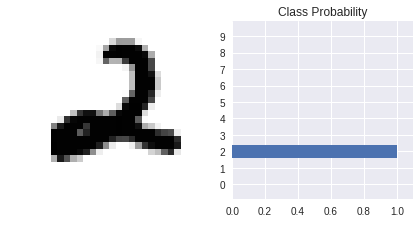

In [68]:
### Get the predictions of the trained network
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
  output = model(img)

### Get the exponential of the network output   
ps = torch.exp(output)  
view_classify(img.view(1 ,28, 28), ps)


**Autograd.** 

In [69]:
### some autograd examples

x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[ 0.9551,  0.3717],
        [-0.5094,  0.1403]], requires_grad=True)


In [70]:
y = x**2
print(y)  

tensor([[0.9122, 0.1381],
        [0.2595, 0.0197]], grad_fn=<PowBackward0>)


In [71]:
### grad_fn shows the function that generated the 'y' variable

print(y.grad_fn)

In [72]:
### scale the 'y' tensor to a scalar

z = y.mean()
print(z)

tensor(0.3324, grad_fn=<MeanBackward1>)


In [73]:
### check the gradient for 'x'

print(x.grad)

None


In [74]:
### calculate the gradient for 'z' with respect to 'x'

z.backward()
print(x.grad)
print(x/2) 

tensor([[ 0.4776,  0.1858],
        [-0.2547,  0.0702]])
tensor([[ 0.4776,  0.1858],
        [-0.2547,  0.0702]], grad_fn=<DivBackward0>)
